1. Implementation of Gradient Boosting using Manual Approach
2. Implementation of Gradient Boosting using Sckit
3. Tweaking learning rate (Manual Approach)
4. Validate Tweaking learning rate (Scikit)

In [40]:
import pandas as pd
import numpy as np

In [41]:
df=pd.DataFrame({'Sqfeet':[750,800,850,900,950],'rent':[1160,1200,1280,1450,2000]})
df

,Sqfeet,rent
0,750,1160
1,800,1200
2,850,1280
3,900,1450
4,950,2000


In [42]:
train_x=df['Sqfeet']
train_y=df['rent']

In [43]:
train_x=train_x.values.reshape(-1,1)
train_x

array([[750],
       [800],
       [850],
       [900],
       [950]], dtype=int64)

Gradient Boosting Procedure (Manual Approach):

1. Build the 1st weak learner with max_depth=1
2. Predict the y(rent) value using 1st weak learner
3. Calculate the residuals (Y(observed)-Y(prediction))
4. Build the 2nd weak learner by setting residual as target value
5. Predict the y(rent) value using our 1st weak learner + 2nd weak learner
6. Calculate the residuals 
7. Build the 3rd weak learner by setting residual as target value
8. Predict,Calculate the residuals
9. Continue the iteration till we close to zero residuals

Considered weak learner is DecisionTreeRegressor()

                                               Build the 1st weak model

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
weak_1=DecisionTreeRegressor(max_depth=1)
weak_1.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

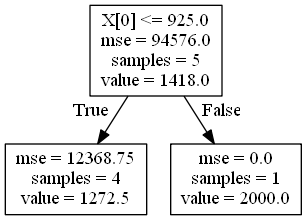

In [47]:
# For visualization
dot_data = export_graphviz(weak_1, out_file=None)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph (on console) # Takes a bit of time
Image(graph.create_png())

In [48]:
# predict for y
weak_1.predict(train_x)

array([1272.5, 1272.5, 1272.5, 1272.5, 2000. ])

In [49]:
# Calculate residuals for the 1st weak learner
residual=train_y-weak_1.predict(train_x)
residual

0   -112.5
1    -72.5
2      7.5
3    177.5
4      0.0
Name: rent, dtype: float64

In [50]:
sum_res_1=sum(abs(residual))
sum_res_1

370.0

                                      Train new weak learner-2 on previous residuals (from weak learner 1)

In [52]:
weak_2=DecisionTreeRegressor(max_depth=1)
weak_2.fit(train_x,residual)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [53]:
weak_2.predict(train_x)

array([-92.5       , -92.5       ,  61.66666667,  61.66666667,
        61.66666667])

In [54]:
# Combine weak_1 + weak_2 to predict y
model_2_pred=weak_1.predict(train_x)+weak_2.predict(train_x)
model_2_pred

array([1180.        , 1180.        , 1334.16666667, 1334.16666667,
       2061.66666667])

In [55]:
# calculate residuals
residual_2=train_y-model_2_pred
residual_2

0    -20.000000
1     20.000000
2    -54.166667
3    115.833333
4    -61.666667
Name: rent, dtype: float64

In [56]:
sum_res_2=sum(abs(residual_2))
sum_res_2

271.6666666666665

                                 Train new weak learner-3 on previous residuals (from weak learner 2)

In [57]:
weak_3=DecisionTreeRegressor(max_depth=1)
weak_3.fit(train_x,residual_2)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
weak_3.predict(train_x)

array([ 15.41666667,  15.41666667,  15.41666667,  15.41666667,
       -61.66666667])

In [59]:
# Combine weak_1 + weak_2 to predict y
model_3_pred=weak_1.predict(train_x)+weak_2.predict(train_x)+weak_3.predict(train_x)
model_3_pred

array([1195.41666667, 1195.41666667, 1349.58333333, 1349.58333333,
       2000.        ])

In [60]:
# calculate residuals
residual_3=train_y-model_3_pred
residual_3

0    -35.416667
1      4.583333
2    -69.583333
3    100.416667
4      0.000000
Name: rent, dtype: float64

In [61]:
sum_res_3=sum(abs(residual_3))
sum_res_3

210.0

In [62]:
Iteration=[1,2,3]
Reduced_res=[sum_res_1,sum_res_2,sum_res_3]

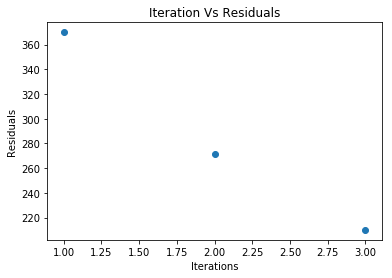

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Iteration,Reduced_res)
plt.title("Iteration Vs Residuals")
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

Note: 
Whatever we have done above, same we can do it using Gradient Boosting Regressor(Black Box). 
Use Learning Rate as 1 and n_estimators as 1 to get our 1st model output (weak_1) and subsequent outputs for validation

                                    Implementation of Gradient Boosting using scikit

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
model=GradientBoostingRegressor(max_depth=1,n_estimators=1,learning_rate=1)
model.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [66]:
model.predict(train_x)

array([1272.5, 1272.5, 1272.5, 1272.5, 2000. ])

In [71]:
res_model=train_y-model.predict(train_x)
res_model

0   -112.5
1    -72.5
2      7.5
3    177.5
4      0.0
Name: rent, dtype: float64

In [73]:
res_1=sum(abs(res_model))
res_1

370.0

We have considered learning rate as 1, n_estimators as 1. So we got the same weak_1 model output(hand cal).

Now try using n_estimators as 2.

                                      n-estimators as 2 and learning rate as 1

In [74]:
model_2=GradientBoostingRegressor(max_depth=1,n_estimators=2,learning_rate=1)
model_2.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [75]:
model_2.predict(train_x)

array([1180.        , 1180.        , 1334.16666667, 1334.16666667,
       2061.66666667])

In [76]:
res_model_2=train_y-model_2.predict(train_x)
res_model_2

0    -20.000000
1     20.000000
2    -54.166667
3    115.833333
4    -61.666667
Name: rent, dtype: float64

In [77]:
res_2=sum(abs(res_model_2))
res_2

271.6666666666665

As you see, model_2 output is same as our second model prediction(weak_1+weak+2)

Now try using n_estimator's as 3.

                                     n-estimators as 3 and learning rate as 1

In [78]:
model_3=GradientBoostingRegressor(max_depth=1,n_estimators=3,learning_rate=1)
model_3.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [79]:
model_3.predict(train_x)

array([1195.41666667, 1195.41666667, 1349.58333333, 1349.58333333,
       2000.        ])

In [80]:
res_model_3=train_y-model_3.predict(train_x)
res_model_3

0    -35.416667
1      4.583333
2    -69.583333
3    100.416667
4      0.000000
Name: rent, dtype: float64

In [81]:
res_3=sum(abs(res_model_3))
res_3

210.0

model_3 output is same as our initial combined predictions(weak_1+weak_2+weak_3)

In [82]:
Iterations=[1,2,3]
res_Reduction=[res_1,res_2,res_3]

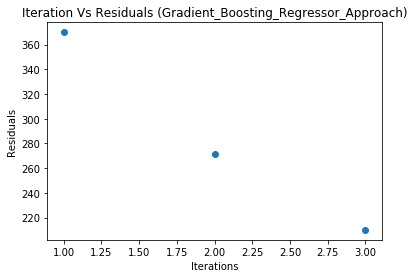

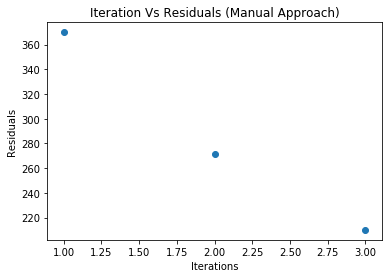

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Iterations,res_Reduction)
plt.title("Iteration Vs Residuals (Gradient_Boosting_Regressor_Approach)")
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()
plt.scatter(Iteration,Reduced_res)
plt.title("Iteration Vs Residuals (Manual Approach)")
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()


                                           Tweak learning rate

Intutively what will happen if we change the learning rate.

First we will demonstrate using manual approach

In [73]:
# Build the base model ie. avergae of rent
base_model=np.average(train_y)
base_model

1418.0

In [64]:
# Calculate total residuals for the base model
res=train_y - np.average(train_y)
res

0   -258.0
1   -218.0
2   -138.0
3     32.0
4    582.0
Name: rent, dtype: float64

In [ ]:
When we give learning rate as 1, it will try to learn the entire residuals.
But when we give learning as 0.1, it will learn only 0.1(res)

In [65]:
res=res*0.1
res

0   -25.8
1   -21.8
2   -13.8
3     3.2
4    58.2
Name: rent, dtype: float64

In [66]:
weak_2_demo=DecisionTreeRegressor(max_depth=1)
weak_2_demo.fit(train_x,res)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [67]:
pred=weak_2_demo.predict(train_x)
pred

array([-14.55, -14.55, -14.55, -14.55,  58.2 ])

In [69]:
comb_pred=np.average(train_y)+pred
comb_pred

array([1403.45, 1403.45, 1403.45, 1403.45, 1476.2 ])

                                         Validate againt Gradient Boosting Regressor

In [70]:
model_d=GradientBoostingRegressor(max_depth=1,n_estimators=1,learning_rate=0.1)
model_d.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [71]:
pred_m=model_d.predict(train_x)
pred_m

array([1403.45, 1403.45, 1403.45, 1403.45, 1476.2 ])

In [ ]:
Summary:

    Using this notebook with 5 samples, we have learnt more intutively about Gradient Boosting and tweaking learning rate.